In [2]:
import os
# Retrieving the current working directory
os.getcwd()


'C:\\Users\\jalad'

In [3]:
os.chdir("C:\\Users\\jalad\\Downloads\\")

In [4]:
os.getcwd()

'C:\\Users\\jalad\\Downloads'

In [5]:
import os
import shutil

#  base directory where all folders are located
base_directory = r'C:\Users\jalad\Downloads\Dataset_Project_1'
# I have created a folder called "final dataset". In this dataset and again I created three class folders to go images from Subject_1 to Subject_55 folders in "Dataset_Project_1".

# destination folders where you want to copy images for each class
destination_folders = {
    "Class 1 Touch": r'C:\Users\jalad\Downloads\final dataset\Class 1 Touch',
    "Class 2 No hands": r'C:\Users\jalad\Downloads\final dataset\Class 2 No hands',
    "Class 3 No Touch w Hands": r'C:\Users\jalad\Downloads\final dataset\Class 3 No Touch w Hands'
}

# counter to keep track of the index for each copied file
index = 1

# all folders in the base directory
for subject_folder in os.listdir(base_directory):
    subject_path = os.path.join(base_directory, subject_folder)
    
    # Checking if the current item is a directory
    if os.path.isdir(subject_path):
        # Iterate over the destination folders
        for class_folder, destination_folder in destination_folders.items():
            # path for the current class folder within the subject path
            class_folder_path = os.path.join(subject_path, class_folder)
            if os.path.exists(class_folder_path) and os.path.isdir(class_folder_path): #  if the class folder exists within the subject path and is a directory
                print(f"Copying images from {class_folder_path} to {destination_folder}") # Print a message the source and destination folders
                # Iterate over the files in the current class folder
                for file_name in os.listdir(class_folder_path):
                    source_file_path = os.path.join(class_folder_path, file_name) # the path for the current file within the class folder
                    # Append a unique identifier (index) to the file name to avoid duplicates
                    destination_file_name = f"image{index}.jpg"
                    destination_file_path = os.path.join(destination_folder, destination_file_name) # the destination file's path within the designated destination folder.
                    shutil.copyfile(source_file_path, destination_file_path) # Copying the source file to the destination file path
                    print(f"Copied {file_name} to {destination_file_name}") # Printing a message indicating the file has been copied
                    index += 1  # Increment the index for the next file 
            else:
                print(f"No '{class_folder}' folder found in {subject_folder}") # Output a notification if the class folder is not found within the subject directory.
    else:
        print(f"{subject_folder} is not a directory")

print("Copying completed.")

Copying images from C:\Users\jalad\Downloads\Dataset_Project_1\Subject_1\Class 1 Touch to C:\Users\jalad\Downloads\final dataset\Class 1 Touch
Copied 0.jpg to image1.jpg
Copied 1.jpg to image2.jpg
Copied 10.jpg to image3.jpg
Copied 100.jpg to image4.jpg
Copied 101.jpg to image5.jpg
Copied 102.jpg to image6.jpg
Copied 103.jpg to image7.jpg
Copied 104.jpg to image8.jpg
Copied 105.jpg to image9.jpg
Copied 106.jpg to image10.jpg
Copied 107.jpg to image11.jpg
Copied 108.jpg to image12.jpg
Copied 109.jpg to image13.jpg
Copied 11.jpg to image14.jpg
Copied 110.jpg to image15.jpg
Copied 111.jpg to image16.jpg
Copied 112.jpg to image17.jpg
Copied 113.jpg to image18.jpg
Copied 114.jpg to image19.jpg
Copied 115.jpg to image20.jpg
Copied 116.jpg to image21.jpg
Copied 117.jpg to image22.jpg
Copied 118.jpg to image23.jpg
Copied 119.jpg to image24.jpg
Copied 12.jpg to image25.jpg
Copied 120.jpg to image26.jpg
Copied 121.jpg to image27.jpg
Copied 122.jpg to image28.jpg
Copied 123.jpg to image29.jpg
Cop

In [7]:
# imported modules
import os
from shutil import copyfile
import random
# I have created another folder in my computer called "final dataset" in that train and test folders are created by this code. 
# Define paths
base_path = "C:\\Users\\jalad\\Downloads\\final dataset"

# Define folders for train and test
train_folder = os.path.join(base_path, "Train")
test_folder = os.path.join(base_path, "Test")

# Create train and test folders if they don't exist
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

# Get a list of all image files
all_images = [] # List to store tuples of image paths and their corresponding class folders
for class_folder in os.listdir(base_path): # Iterate through each folder in the base path
    class_path = os.path.join(base_path, class_folder) #  Path for the current class folder
    if os.path.isdir(class_path): #  Check if it's a directory
        for img_file in os.listdir(class_path): # Iterate through each file in the class folder
            img_path = os.path.join(class_path, img_file) # for the current image path
            all_images.append((img_path, class_folder)) # Adding image path and class folder to the list

# Shuffle the list of images
random.shuffle(all_images)

# Define ratios for train and test sets 80 for traing and 20 for testing
train_ratio = 0.8
test_ratio = 0.2

# Split the list of images into train and test sets
num_images = len(all_images) # Total number of images
num_train = int(train_ratio * num_images) # No of images for training
num_test = num_images - num_train #  No of images for testing

train_set = all_images[:num_train] # Training set 
test_set = all_images[num_train:] # Testing set 

# Function to copy images from source to destination
def copy_images(img_set, dest_folder):
    class_counts = {}     # to store counts of images for each class
    for img_path, class_folder in img_set: # through each image in the set iterate
        dest_class_folder = os.path.join(dest_folder, class_folder) # Path for the destination class folder
        os.makedirs(dest_class_folder, exist_ok=True)  # Create destination class folder if it doesn't exist
        file_name = os.path.basename(img_path) # Get the file name of the image
        dest_img_path = os.path.join(dest_class_folder, file_name) # Destination path
        copyfile(img_path, dest_img_path) # copy the image to destination
        class_counts[class_folder] = class_counts.get(class_folder, 0) + 1 # Increment image count for the class
    return class_counts # Return the dictionary of class counts

# Count the number of images in each class
class_counts = {}
for img_path, class_folder in all_images: #Iterate through each image in all_images
    class_counts[class_folder] = class_counts.get(class_folder, 0) + 1 # image count for the class increment

# Print the number of images in each class
print("Number of images in each class:") 
for class_name, count in class_counts.items(): 
    print(f"{class_name}: {count} images") 

# Prepare train and test data
train_counts = copy_images(train_set, train_folder) #  Copying images to the train folder and get class counts
test_counts = copy_images(test_set, test_folder) # Copying images to the test folder and get class counts

# Print the number of images in each class for train and test sets
print("\nTrain set:")
for class_name, count in train_counts.items(): # Iterate through each class count in the train set
    print(f"{class_name}: {count} images")  # Print class name and count of images

print("\nTest set:")
for class_name, count in test_counts.items(): # Iterate through each class count in the test set
    print(f"{class_name}: {count} images") #  # Print class name and count of images

Number of images in each class:
Class 3 No Touch w Hands: 18646 images
Class 2 No hands: 18195 images
Class 1 Touch: 18166 images

Train set:
Class 3 No Touch w Hands: 14930 images
Class 2 No hands: 14571 images
Class 1 Touch: 14504 images

Test set:
Class 1 Touch: 3662 images
Class 2 No hands: 3624 images
Class 3 No Touch w Hands: 3716 images


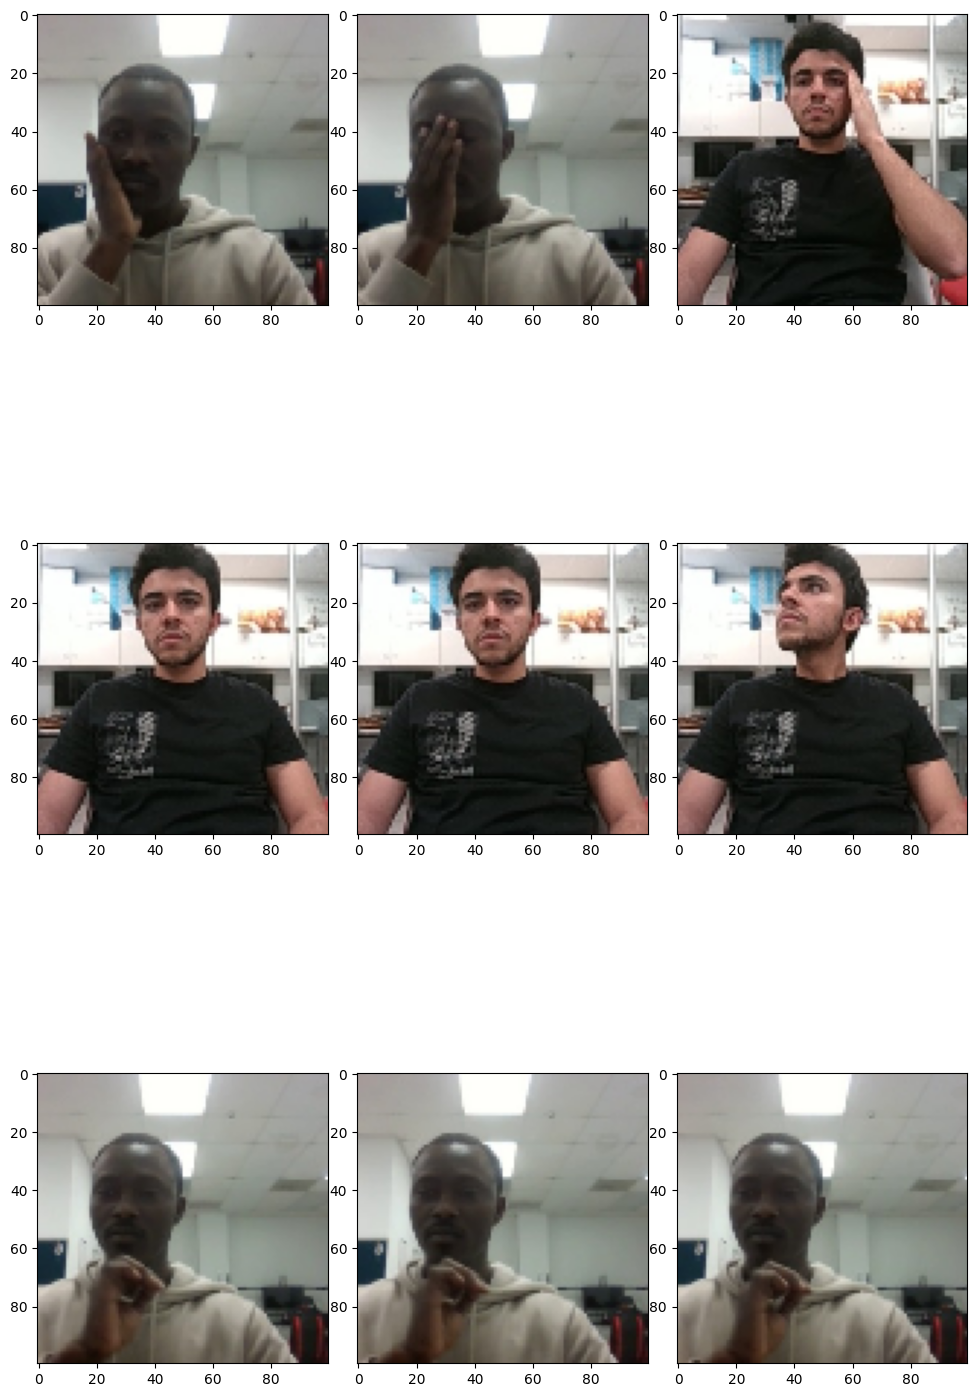

In [10]:
import numpy as np
import seaborn as sns
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam
# pic size
pic_s = 100

# base path
base_p = "C:\\Users\\jalad\\Downloads\\final dataset\\"

plt.figure(0, figsize=(12, 20)) # a figure with identifier 0 and set its size to 12x20 inches
cpt = 0 #  Initialize a counter variable

for expression in os.listdir(base_p + "/train/"): 
    for i in range(1, 4):  # Iterate over the first 3 images
        cpt = cpt + 1 # increment
        plt.subplot(3, 3, cpt)  # Create a 3x3 grid
        img = load_img(base_p + "/train/" + expression + "/" + os.listdir(base_p + "/train/" + expression)[i], target_size=(pic_s, pic_s)) # Loading the image located at the specified path and resize
        plt.imshow(img, cmap="gray") # 






In [1]:
#imported modules
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers.schedules import ExponentialDecay
import cv2
from keras.models import model_from_json
import numpy as np

In [2]:
# Created an ImageDataGenerator  for training
train_datagen = ImageDataGenerator()

# Created an ImageDataGenerator  for testing
test_datagen = ImageDataGenerator()

In [3]:
# batches of augmented data from the training directory
train_generl= train_datagen.flow_from_directory(
    'C:\\Users\\jalad\\Downloads\\final dataset\\Train',  # Path for the training directory
    target_size=(112, 112), # image size
    batch_size=64,   # batch size
    color_mode="rgb", # color of the image
    class_mode='categorical', # type of label returned
    shuffle=True)


test_generl= test_datagen.flow_from_directory(
        'C:\\Users\\jalad\\Downloads\\final dataset\\Test',  # Path for the testing directory
        target_size=(112, 112), # image size
        batch_size=64, # batch size
        color_mode="rgb", # color of the image
        class_mode='categorical') # type of label returned

Found 44005 images belonging to 3 classes.
Found 11002 images belonging to 3 classes.


In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.optimizers import Adam
from keras.optimizers.schedules import ExponentialDecay

# Define the model architecture
model_cnn1 = Sequential()

# Increase the number of filters in the first convolutional layer
model_cnn1.add(Conv2D(64, kernel_size=(3, 3), padding='same', strides=(1, 1), input_shape=(112, 112, 3)))
model_cnn1.add(BatchNormalization())
model_cnn1.add(Activation('relu'))

# Add another convolutional layer before the max-pooling layer
model_cnn1.add(Conv2D(64, kernel_size=(3, 3), padding='same', strides=(1, 1)))
model_cnn1.add(BatchNormalization())
model_cnn1.add(Activation('relu'))
model_cnn1.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn1.add(Dropout(0.25))

# Increase the number of filters in the subsequent convolutional layers
model_cnn1.add(Conv2D(128, kernel_size=(3, 3), padding='same', strides=(1, 1)))
model_cnn1.add(BatchNormalization())
model_cnn1.add(Activation('relu'))
model_cnn1.add(MaxPooling2D(pool_size=(2, 2)))

model_cnn1.add(Conv2D(256, kernel_size=(3, 3), padding='same', strides=(1, 1)))
model_cnn1.add(BatchNormalization())
model_cnn1.add(Activation('relu'))
model_cnn1.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn1.add(Dropout(0.25))

model_cnn1.add(Flatten())
model_cnn1.add(Dense(1024, activation='relu'))
model_cnn1.add(Dropout(0.5))
model_cnn1.add(Dense(3, activation='softmax'))

model_cnn1.summary()

# Disable OpenCL for cv2
# cv2.ocl.setUseOpenCL(False)

# Define the learning rate schedule
initial_learning = 0.0001
lr_sche = ExponentialDecay(initial_learning, decay_steps=100000, decay_rate=0.96)

# Compile the model
opti = Adam(learning_rate=lr_sche)
model_cnn1.compile(loss='categorical_crossentropy', optimizer=opti, metrics=['accuracy'])



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 112, 112, 64)      1792      
                                                                 
 batch_normalization (Batch  (None, 112, 112, 64)      256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 112, 112, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 batch_normalization_1 (Bat  (None, 112, 112, 64)      256       
 chNormalization)                                                
                                                                 
 activation_1 (Activation)   (None, 112, 112, 64)     

In [5]:
epochs = 30 # number of epochs to train

from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("model_cb.h5", monitor='val_acc', verbose=1, mode='max') # # ModelCheckpoint object to save model weights during training
callback= [checkpoint] # Generating a callback list that exclusively includes the ModelCheckpoint callback
# Training model8 with the training dataset and validating its performance with the validation dataset.
#The validation_data parameter indicates the dataset used for evaluating the model's performance after each epoch during training.

# The validation_steps parameter indicates the quantity of batches to be processed from the validation dataset in every epoch.
# the callbacks parameter specifies a collection of callback functions to be utilized during training.
history_q = model_cnn1.fit(x=train_generl,
                            steps_per_epoch=train_generl.n//train_generl.batch_size,
                            epochs=epochs,
                            validation_data =test_generl,
                            validation_steps =test_generl.n//test_generl.batch_size,
                            callbacks=callback
                            )
model_cnn1.save("model_cb.h5") # Saving the model to a Hierarchical Data Format 

model_cnn1.save("model_cb.keras") # Saving the model to a Keras Sequential model file

Epoch 1/30


687/687 [==============================] - ETA: 0s - loss: 0.7843 - accuracy: 0.7110
Epoch 1: saving model to model_cb.h5


C:\Users\jalad\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


687/687 [==============================] - 1006s 1s/step - loss: 0.7843 - accuracy: 0.7110 - val_loss: 0.2508 - val_accuracy: 0.9237
Epoch 2/30
687/687 [==============================] - ETA: 0s - loss: 0.1922 - accuracy: 0.9344
Epoch 2: saving model to model_cb.h5
687/687 [==============================] - 1075s 2s/step - loss: 0.1922 - accuracy: 0.9344 - val_loss: 0.1563 - val_accuracy: 0.9446
Epoch 3/30
687/687 [==============================] - ETA: 0s - loss: 0.0959 - accuracy: 0.9679
Epoch 3: saving model to model_cb.h5
687/687 [==============================] - 1070s 2s/step - loss: 0.0959 - accuracy: 0.9679 - val_loss: 0.0488 - val_accuracy: 0.9860
Epoch 4/30
687/687 [==============================] - ETA: 0s - loss: 0.0648 - accuracy: 0.9791
Epoch 4: saving model to model_cb.h5
687/687 [==============================] - 1045s 2s/step - loss: 0.0648 - accuracy: 0.9791 - val_loss: 0.0260 - val_accuracy: 0.9947
Epoch 5/30
687/687 [==============================] - ETA: 0s - loss:

In [6]:
#Assess the model's performance on the validation dataset and save the outcomes in the variable named 'evaluation'
evaluation=model_cnn1.evaluate(test_generl)
#Display the validation loss retrieved from the evaluation outcomes
print("Validation Loss:", evaluation[0])
# Output the validation accuracy acquired from the evaluation outcomes.
print("Validation Accuracy:", evaluation[1])

172/172 [==============================] - 48s 280ms/step - loss: 0.0034 - accuracy: 0.9988
Validation Loss: 0.0034051877446472645
Validation Accuracy: 0.9988183975219727


In [7]:
# Extract accuracy from evaluation results
overall_accuracy = evaluation[1]
print("Overall Accuracy:", overall_accuracy)

Overall Accuracy: 0.9988183975219727


In [8]:
# Retrieve the historical training accuracy and save it into the variable named 'accuracy'
accuracy = history_q.history['accuracy']
# Obtain the historical validation accuracy and store it in the variable called 'val_accuracy'.
val_accuracy = history_q.history['val_accuracy']
# Capture the historical training loss and store it in the variable named 'loss'.
loss = history_q.history['loss']
# Retrieve the historical validation loss and store it in the variable named 'val_loss'
val_loss = history_q.history['val_loss']

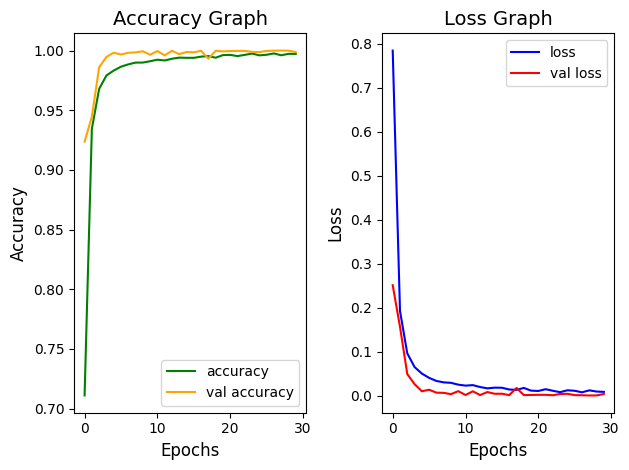

In [9]:
import matplotlib.pyplot as plt

# Accuracy graph
plt.subplot(1, 2, 1) #Create the first subplot in a 1x2 grid
plt.plot(accuracy, label='accuracy', color='green') # Plotting the training accuracy
plt.plot(val_accuracy, label='val accuracy', color='orange')  # Plotting the validation accuracy
plt.title('Accuracy Graph', fontsize=14) # the title of the subplot
plt.xlabel('Epochs', fontsize=12)  # label for the x-axis
plt.ylabel('Accuracy', fontsize=12) #label for the y-axis
plt.legend(fontsize=10) # display

# Loss graph
plt.subplot(1, 2, 2) # Create the second subplot in a 1x2
plt.plot(loss, label='loss', color='blue')  # training loss plotting
plt.plot(val_loss, label='val loss', color='red')  # the validation loss
plt.title('Loss Graph', fontsize=14) # title
plt.xlabel('Epochs', fontsize=12) # label for the x-axis
plt.ylabel('Loss', fontsize=12) # label for the y-axis
plt.legend(fontsize=10) # display 

plt.tight_layout() # subplot parameters to give specified padding
plt.show() # display

In [10]:
# Produce predictions on the validation dataset with the trained model and store the results in the variable named 'predictions'
predictions = model_cnn1.predict(test_generl)
# Retrieve the predicted class labels by choosing the class with the highest probability for each prediction.
predict = [np.argmax(probas) for probas in predictions]
# the actual class labels from the validation dataset and save them into the variable named 'test'.
test = test_generl.classes
# Get the names of the classes from the validation dataset and store them in the variable named 'class_name'.
class_name = test_generl.class_indices.keys()

172/172 [==============================] - 48s 279ms/step


<Figure size 640x480 with 0 Axes>

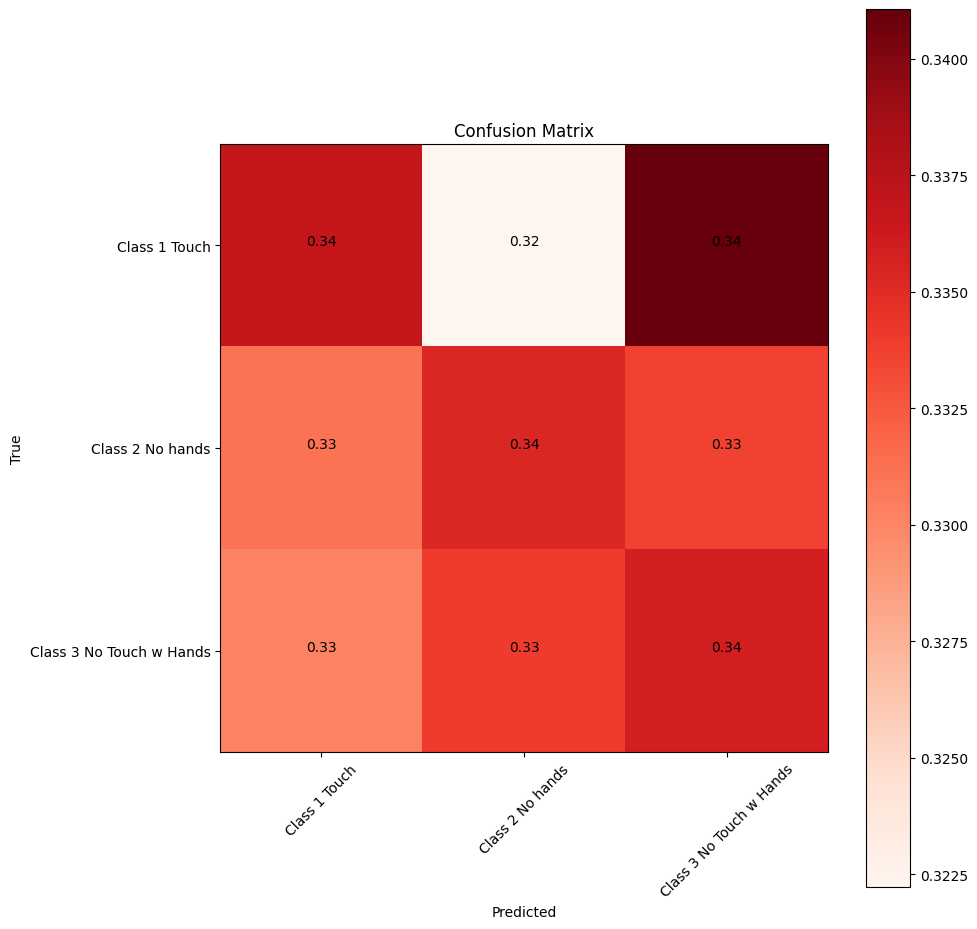

In [11]:
from sklearn.metrics import confusion_matrix
import itertools
# function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Reds):  
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # Normalize the confusion matrix
    plt.figure(figsize=(10,10))  # figure size
    plt.imshow(cm, interpolation='nearest', cmap=cmap)   
    plt.title(title) #title of the plot
    plt.colorbar() # Add a color bar
    marks = np.arange(len(classes))  # Create markers for class labels
    plt.xticks(marks, classes, rotation=45) # Define the x-axis tick labels using the class names and rotate them for better readability
    plt.yticks(marks, classes) # y-axis tick marks using the class names.

    f = '.2f' # Specify the format for the text displayed in the confusion matrix
    t = cm.max() / 2.  # Threshold for text color
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])): #  Iterate over confusion matrix elements
        plt.text(j, i, format(cm[i, j], f), # text to plot with format
                 horizontalalignment="center", # Center alignment
                 color="black" if cm[i, j] > t else "black")  # Adjust the color of the text in the confusion matrix based on a specified threshold
        plt.ylabel('True') # y-axis label
    plt.xlabel('Predicted') #  x-axis label
    plt.tight_layout()  # Adjust layout
# compute confusion matrix
confusion = confusion_matrix(test, predict)
np.set_printoptions(precision=2)
# plot normalized confusion matrix
plt.figure()
# Designate the colormap (cmap) for the color scheme used in the confusion matrix plot
plot_confusion_matrix(confusion, classes=class_name, title='Confusion Matrix', cmap=plt.cm.Reds)  
plt.show() # display the plot
